In [1]:
import pandas
import matplotlib.pyplot as plt

In [4]:
data = pandas.read_csv("data/ds_salaries.csv")
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
data.drop(columns="Unnamed: 0", inplace=True)

In [7]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [9]:
data.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [10]:
# Question 1: How has the average salary of a data scientist by level changed over the years?

In [22]:
salary = data.groupby(["experience_level", "work_year"])["salary_in_usd"].mean()
salary

experience_level  work_year
EN                2020          63648.600000
                  2021          59101.021277
                  2022          65423.428571
EX                2020         202416.500000
                  2021         223752.727273
                  2022         178313.846154
MI                2020          85950.062500
                  2021          85490.088889
                  2022          91193.956044
SE                2020         137240.500000
                  2021         126596.188406
                  2022         143043.398964
Name: salary_in_usd, dtype: float64

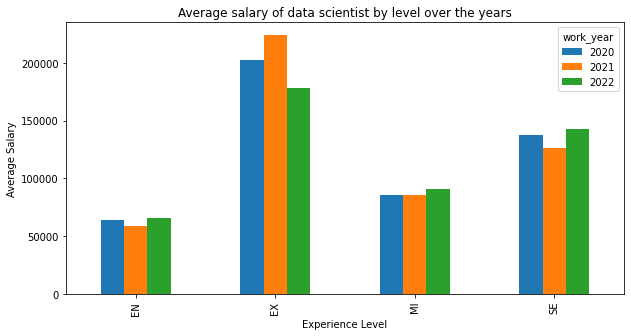

In [23]:
salary.unstack().plot(kind='bar', figsize=(10, 5))
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.title("Average salary of data scientist by level over the years")
plt.show()

In [ ]:
# The average salary of ds jobs is not change too much over years

In [21]:
salary.unstack()

work_year,2020,2021,2022
experience_level,,,
EN,63648.6000,59101.021277,65423.428571
EX,202416.5000,223752.727273,178313.846154
MI,85950.0625,85490.088889,91193.956044
SE,137240.5000,126596.188406,143043.398964


In [ ]:
# Question 2: How has the type of work changed over the years?

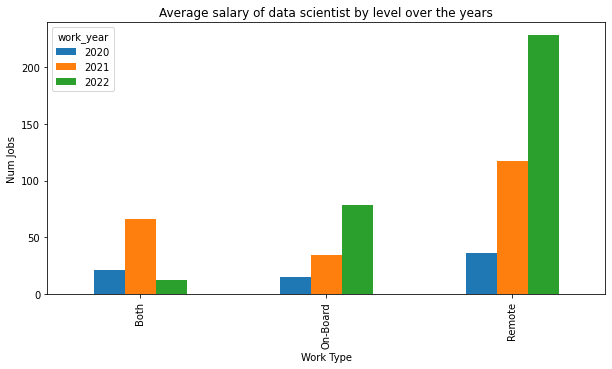

In [26]:
data["working_type"] = data["remote_ratio"].map({100: "Remote", 50: "Both", 0: "On-Board"})
remote = data.groupby(["working_type", "work_year"]).size()
remote.unstack().plot(kind='bar', figsize=(10, 5))
plt.xlabel("Work Type")
plt.ylabel("Num Jobs")
plt.title("Average salary of data scientist by level over the years")
plt.show()

In [27]:
# The type of remote work that grows exponentially from 2020 to 2022

In [ ]:
# Question 3: The bigger the company, the higher the salary?

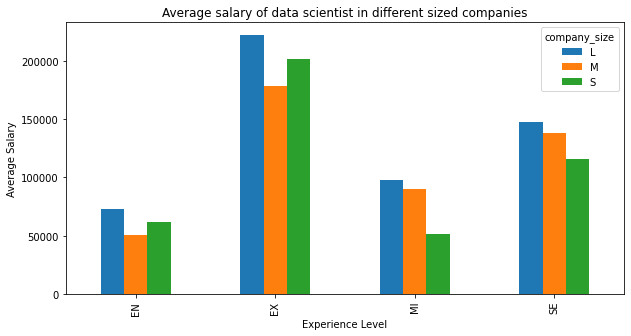

In [51]:
data.groupby(["experience_level", "company_size"])["salary_in_usd"].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.title("Average salary of data scientist in different sized companies")
plt.show()

In [ ]:
# The bigger the company, the higher the salary